🔍 PLANCK PR4 NILC Y-MAP ANALYSIS
🔍 LOADING PR4 NILC Y-MAP AND MASKS
Y-map columns: ('FULL', 'HALF-RING 1', 'HALF-RING 2')
NSIDE: 2048
Coordinate system: GALACTIC
Ordering: RING
Mask columns: ('NILC-MASK', 'GAL-MASK', 'PS-MASK')

📊 Y-MAP QUALITY ANALYSIS
FULL MISSION Y-MAP:
  Pixels: 50,331,648
  Mean: 3.166311e-09
  Median: -9.189833e-09
  Std: 4.409196e-06
  Range: [-1.180000e-03, 6.831932e-04]
  P1-P99: [-7.571591e-06, 8.276567e-06]
  P5-P95: [-3.112293e-06, 3.080215e-06]

✅ QUALITY ASSESSMENT:
✅ Excellent: Mean ≈ 0 (no monopole)
✅ Good: Std in expected range for y-map

🔊 NOISE ANALYSIS:
  Half-mission difference std: 1.277808e-06
  Full mission std: 4.409196e-06
  S/N estimate: 3.5

🌟 BRIGHT CLUSTERS:
  Pixels > P99.9 (3.369542e-05): 50332
  Brightest pixel: 6.831932e-04

🎭 MASK ANALYSIS
NILC-MASK (processing mask):
  Mean coverage: 98.1%
  Type: Fractional

GAL-MASK (Galactic mask):
  Mean coverage: 60.0%
  Type: Fractional

PS-MASK (Point source mask):
  Mean coverage: 93.0%
  Typ

/tmp/ipykernel_676178/1950842065.py:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


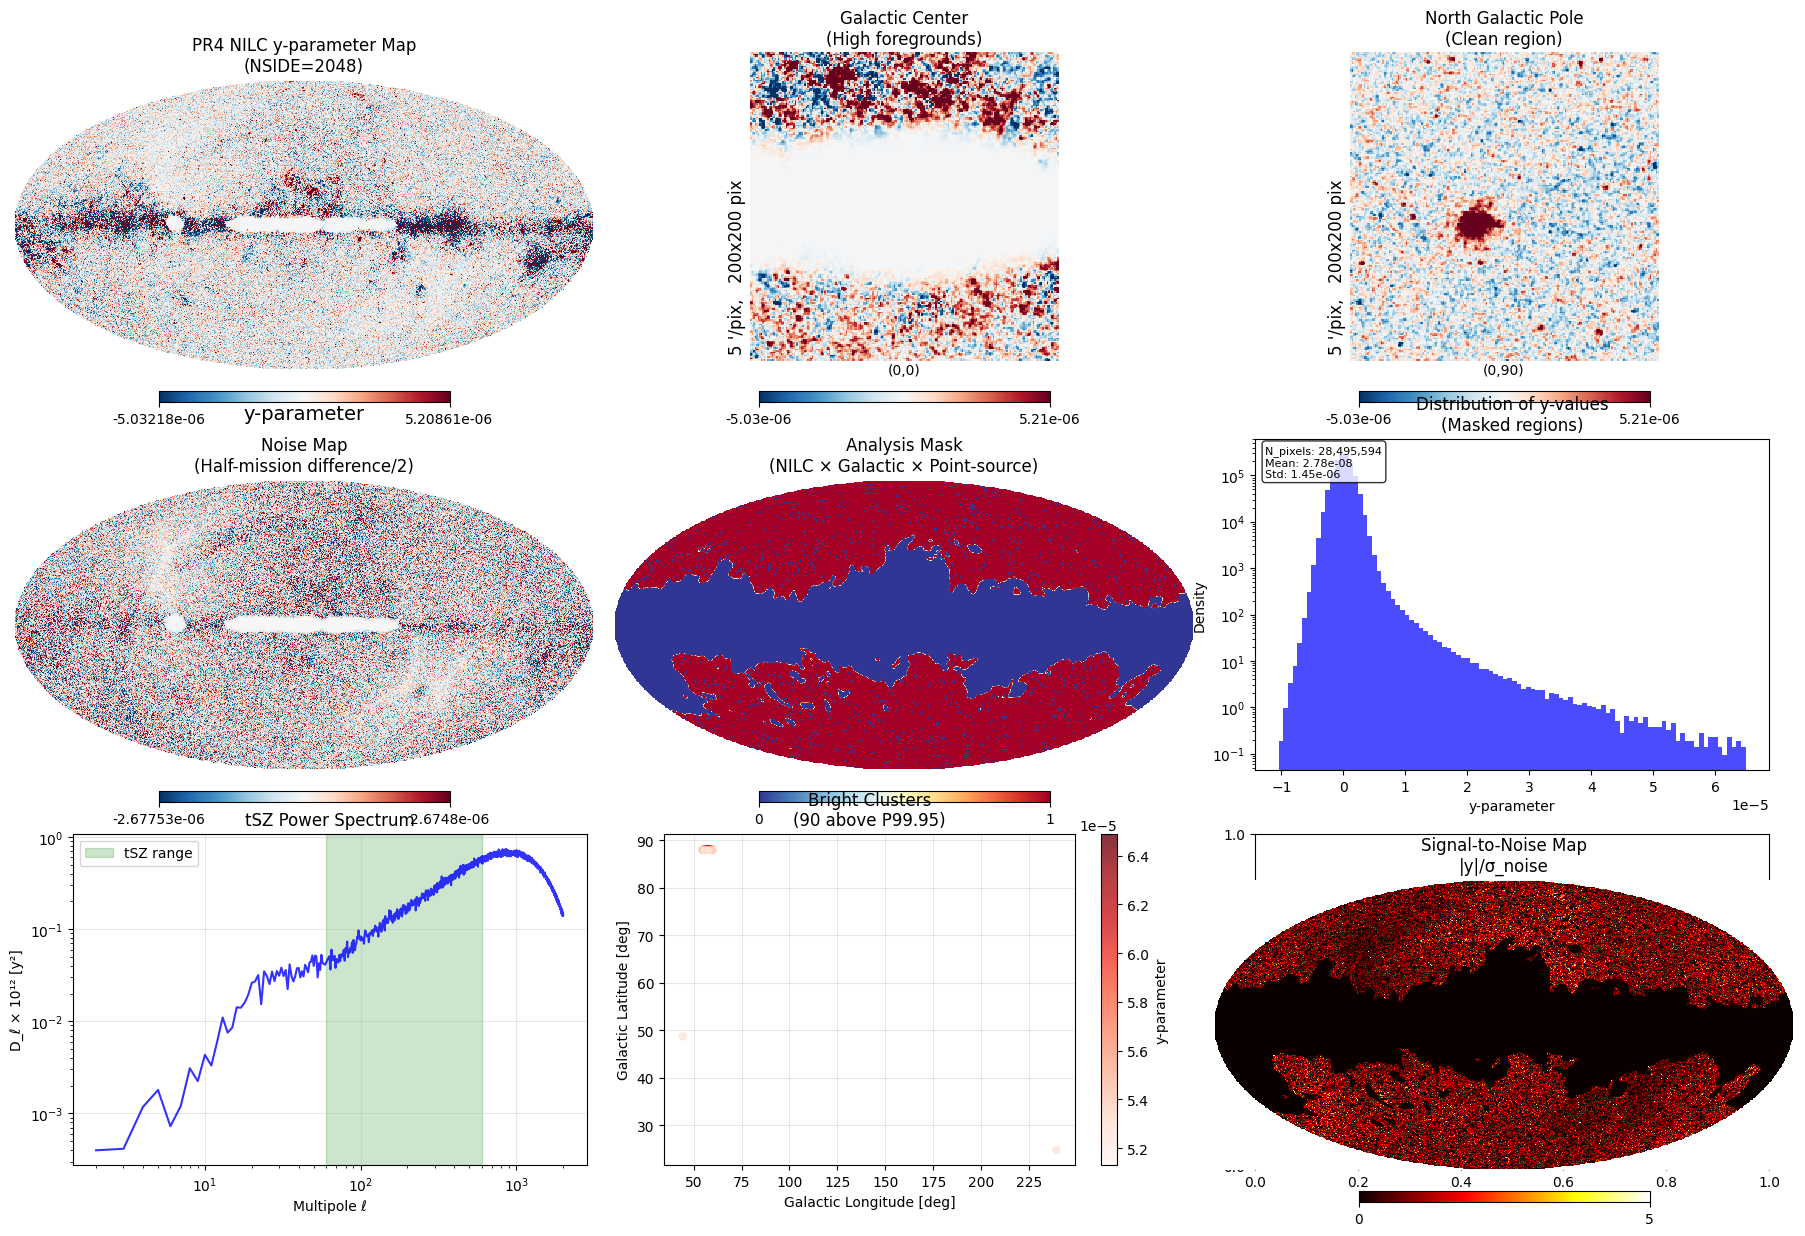


🎯 CLUSTER ANALYSIS RECOMMENDATIONS
✅ Usable sky fraction: 56.6%
✅ Noise level: 4.41e-06 (y-parameter)
✅ Detection thresholds:
   3σ: 1.32e-05
   5σ: 2.20e-05
✅ Bright clusters (>5σ): 1815

📋 USAGE RECOMMENDATIONS:
1. Use 'FULL' column for main analysis
2. Apply combined mask (NILC × GAL × PS)
3. Focus on high Galactic latitudes (|b| > 20°)
4. Expected noise for cluster stacking: ~4.4e-06
5. This map is ready for aperture photometry!

🎉 ANALYSIS COMPLETE!
Your PR4 NILC y-map is ready for cluster analysis!


In [3]:
#!/usr/bin/env python3
"""
Analyze the 2024 Planck PR4 NILC y-map - Fixed version
"""

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits
from data_loader.pr4_data import load_pr4_data

def analyze_y_map_quality(data):
    """Analyze the quality and characteristics of the y-map"""
    
    y_map = data['y_map']
    y_half1 = data['y_half1']
    y_half2 = data['y_half2']
    
    print(f"\n📊 Y-MAP QUALITY ANALYSIS")
    print("="*40)
    
    # Basic statistics
    print(f"FULL MISSION Y-MAP:")
    print(f"  Pixels: {len(y_map):,}")
    print(f"  Mean: {np.mean(y_map):.6e}")
    print(f"  Median: {np.median(y_map):.6e}")
    print(f"  Std: {np.std(y_map):.6e}")
    print(f"  Range: [{np.min(y_map):.6e}, {np.max(y_map):.6e}]")
    
    # Percentiles
    p1, p5, p95, p99 = np.percentile(y_map, [1, 5, 95, 99])
    print(f"  P1-P99: [{p1:.6e}, {p99:.6e}]")
    print(f"  P5-P95: [{p5:.6e}, {p95:.6e}]")
    
    # Quality checks
    print(f"\n✅ QUALITY ASSESSMENT:")
    if abs(np.mean(y_map)) < 1e-7:
        print(f"✅ Excellent: Mean ≈ 0 (no monopole)")
    else:
        print(f"⚠️  Small monopole: {np.mean(y_map):.6e}")
    
    if 1e-7 < np.std(y_map) < 1e-4:
        print(f"✅ Good: Std in expected range for y-map")
    else:
        print(f"⚠️  Unusual std: {np.std(y_map):.6e}")
    
    # Compare half-mission maps (noise assessment)
    noise_map = (y_half1 - y_half2) / 2.0
    noise_std = np.std(noise_map)
    signal_std = np.std(y_map)
    
    print(f"\n🔊 NOISE ANALYSIS:")
    print(f"  Half-mission difference std: {noise_std:.6e}")
    print(f"  Full mission std: {signal_std:.6e}")
    print(f"  S/N estimate: {signal_std/noise_std:.1f}")
    
    # Look for bright clusters
    high_threshold = np.percentile(y_map, 99.9)
    bright_pixels = np.sum(y_map > high_threshold)
    print(f"\n🌟 BRIGHT CLUSTERS:")
    print(f"  Pixels > P99.9 ({high_threshold:.6e}): {bright_pixels}")
    print(f"  Brightest pixel: {np.max(y_map):.6e}")
    
    return noise_map

def analyze_masks(data):
    """Analyze the different masks"""
    
    nilc_mask = data['nilc_mask']
    gal_mask = data['gal_mask']
    ps_mask = data['ps_mask']
    
    print(f"\n🎭 MASK ANALYSIS")
    print("="*30)
    
    print(f"NILC-MASK (processing mask):")
    print(f"  Mean coverage: {np.mean(nilc_mask):.1%}")
    print(f"  Type: {'Binary' if len(np.unique(nilc_mask)) == 2 else 'Fractional'}")
    
    print(f"\nGAL-MASK (Galactic mask):")
    print(f"  Mean coverage: {np.mean(gal_mask):.1%}")
    print(f"  Type: {'Binary' if len(np.unique(gal_mask)) == 2 else 'Fractional'}")
    
    print(f"\nPS-MASK (Point source mask):")
    print(f"  Mean coverage: {np.mean(ps_mask):.1%}")
    print(f"  Type: {'Binary' if len(np.unique(ps_mask)) == 2 else 'Fractional'}")
    
    # Combined mask recommendation
    combined_mask = nilc_mask * gal_mask * ps_mask
    print(f"\nCOMBINED MASK (all three):")
    print(f"  Coverage: {np.mean(combined_mask):.1%}")
    
    return combined_mask

def create_comprehensive_plots(data, noise_map, combined_mask):
    """Create publication-quality plots"""
    
    y_map = data['y_map']
    nside = data['nside']
    
    print(f"\n📊 CREATING PLOTS...")
    
    # Calculate plot parameters
    pixel_size_arcmin = hp.nside2resol(nside, arcmin=True)
    print(f"Map resolution: NSIDE={nside}, pixel size={pixel_size_arcmin:.1f} arcmin")
    
    # Robust color scaling
    vmin, vmax = np.percentile(y_map, [2, 98])
    
    # Create figure
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Full-sky y-map
    hp.mollview(y_map, title=f'PR4 NILC y-parameter Map\n(NSIDE={nside})',
                min=vmin, max=vmax, cmap='RdBu_r', unit='y-parameter',
                sub=(3, 3, 1))
    
    # 2. Galactic center region (avoid for cluster analysis)
    hp.gnomview(y_map, rot=[0, 0], reso=5, 
                title='Galactic Center\n(High foregrounds)',
                min=vmin, max=vmax, cmap='RdBu_r', sub=(3, 3, 2))
    
    # 3. North Galactic pole (clean region)
    hp.gnomview(y_map, rot=[0, 90], reso=5,
                title='North Galactic Pole\n(Clean region)', 
                min=vmin, max=vmax, cmap='RdBu_r', sub=(3, 3, 3))
    
    # 4. Noise map
    noise_vmin, noise_vmax = np.percentile(noise_map, [2, 98])
    hp.mollview(noise_map, title='Noise Map\n(Half-mission difference/2)',
                min=noise_vmin, max=noise_vmax, cmap='RdBu_r',
                sub=(3, 3, 4))
    
    # 5. Combined mask
    hp.mollview(combined_mask, title='Analysis Mask\n(NILC × Galactic × Point-source)',
                cmap='RdYlBu_r', sub=(3, 3, 5))
    
    # 6. Histogram of y-values
    plt.subplot(3, 3, 6)
    # Use masked data for histogram
    masked_y = y_map[combined_mask > 0.5]
    plt.hist(masked_y, bins=100, alpha=0.7, density=True, color='blue')
    plt.xlabel('y-parameter')
    plt.ylabel('Density')
    plt.title('Distribution of y-values\n(Masked regions)')
    plt.yscale('log')
    
    # Add statistics
    stats_text = f'N_pixels: {len(masked_y):,}\n'
    stats_text += f'Mean: {np.mean(masked_y):.2e}\n'
    stats_text += f'Std: {np.std(masked_y):.2e}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 7. Power spectrum
    plt.subplot(3, 3, 7)
    # Use masked map for power spectrum
    masked_map = y_map * combined_mask
    cl = hp.anafast(masked_map, lmax=2000)
    ell = np.arange(len(cl))
    
    # Convert to D_l = l(l+1)C_l/(2π)
    dl = ell * (ell + 1) * cl / (2 * np.pi) * 1e12  # Convert to 10^-12 units
    
    plt.loglog(ell[2:], dl[2:], 'b-', alpha=0.8)
    plt.xlabel('Multipole ℓ')
    plt.ylabel('D_ℓ × 10¹² [y²]')
    plt.title('tSZ Power Spectrum')
    plt.grid(True, alpha=0.3)
    
    # Mark tSZ-dominated range
    plt.axvspan(60, 600, alpha=0.2, color='green', label='tSZ range')
    plt.legend()
    
    # 8. Bright cluster locations
    plt.subplot(3, 3, 8)
    bright_threshold = np.percentile(y_map, 99.95)
    bright_mask = (y_map > bright_threshold) & (combined_mask > 0.5)
    
    if np.sum(bright_mask) > 0:
        # Convert to coordinates
        bright_indices = np.where(bright_mask)[0]
        theta, phi = hp.pix2ang(nside, bright_indices, nest=False)
        
        # Convert to Galactic coordinates
        gal_lon = np.degrees(phi)
        gal_lat = 90 - np.degrees(theta)
        
        plt.scatter(gal_lon, gal_lat, c=y_map[bright_mask], 
                   cmap='Reds', s=20, alpha=0.8)
        plt.xlabel('Galactic Longitude [deg]')
        plt.ylabel('Galactic Latitude [deg]')
        plt.title(f'Bright Clusters\n({len(bright_indices)} above P99.95)')
        plt.grid(True, alpha=0.3)
        plt.colorbar(label='y-parameter')
    else:
        plt.text(0.5, 0.5, 'No bright clusters\nfound', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Bright Clusters')
    
    # 9. Signal-to-noise map
    plt.subplot(3, 3, 9)
    # Calculate local S/N (crude estimate)
    sn_map = np.abs(y_map) / np.std(noise_map)
    sn_map_masked = sn_map * combined_mask
    
    hp.mollview(sn_map_masked, title='Signal-to-Noise Map\n|y|/σ_noise',
                max=5, cmap='hot', sub=(3, 3, 9))
    
    plt.tight_layout()
    plt.show()

def print_cluster_analysis_recommendations(data, combined_mask):
    """Provide recommendations for cluster analysis"""
    
    y_map = data['y_map']
    nside = data['nside']
    
    print(f"\n🎯 CLUSTER ANALYSIS RECOMMENDATIONS")
    print("="*50)
    
    # Available sky
    sky_fraction = np.mean(combined_mask)
    print(f"✅ Usable sky fraction: {sky_fraction:.1%}")
    
    # Noise level
    noise_level = np.std(y_map)
    print(f"✅ Noise level: {noise_level:.2e} (y-parameter)")
    
    # Detection threshold estimates
    detection_3sigma = 3 * noise_level
    detection_5sigma = 5 * noise_level
    print(f"✅ Detection thresholds:")
    print(f"   3σ: {detection_3sigma:.2e}")
    print(f"   5σ: {detection_5sigma:.2e}")
    
    # Bright cluster count
    bright_clusters = np.sum((y_map > detection_5sigma) & (combined_mask > 0.5))
    print(f"✅ Bright clusters (>5σ): {bright_clusters}")
    
    print(f"\n📋 USAGE RECOMMENDATIONS:")
    print(f"1. Use 'FULL' column for main analysis")
    print(f"2. Apply combined mask (NILC × GAL × PS)")
    print(f"3. Focus on high Galactic latitudes (|b| > 20°)")
    print(f"4. Expected noise for cluster stacking: ~{noise_level:.1e}")
    print(f"5. This map is ready for aperture photometry!")

def main():
    """Main analysis routine"""
    
    print("🔍 PLANCK PR4 NILC Y-MAP ANALYSIS")
    print("="*50)
    
    # Load data
    data = load_pr4_data()
    
    # Analyze y-map quality
    noise_map = analyze_y_map_quality(data)
    
    # Analyze masks
    combined_mask = analyze_masks(data)
    
    # Create plots
    create_comprehensive_plots(data, noise_map, combined_mask)
    
    # Recommendations
    print_cluster_analysis_recommendations(data, combined_mask)
    
    print(f"\n🎉 ANALYSIS COMPLETE!")
    print(f"Your PR4 NILC y-map is ready for cluster analysis!")
    
    return data, combined_mask

if __name__ == "__main__":
    data, mask = main()